In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
test_G = nx.karate_club_graph()

In [3]:
# "Note that due to exponential decay of the influence of individual eigenvalues, 
# only a few eigenpairs are necessary to estimate HKS for large values of t. For 
# all of the experiments in this paper, we used k=300." 
# https://ieeexplore.ieee.org/document/5543285/

def heat_kernel(G, t, u, v):
    L = nx.laplacian_matrix(G)
    L = L.toarray()
    eig_val, eig_vec = np.linalg.eig(L)
    phi_u = eig_vec[u, :]
    phi_v = eig_vec[v, :]
    return np.sum(np.exp(-eig_val * t) * phi_u * phi_v)

def hks(G, t, x):
    return heat_kernel(G, t, x, x)

def heat_kernel_s(G, t, u, v, k=300):
    if G.number_of_nodes() < 300:
        k = G.number_of_nodes() - 1
    L = nx.laplacian_matrix(G).asfptype()
    eig_val, eig_vec = eigsh(L, k)
    phi_u = eig_vec[u, :]
    phi_v = eig_vec[v, :]
    return np.sum(np.exp(-eig_val * t) * phi_u * phi_v)

def hks_s(G, t, x, k=300):
    return heat_kernel_s(G, t, x, x, k)

In [4]:
val, vec = np.linalg.eig(nx.laplacian_matrix(test_G).toarray())

In [5]:
def set_hks_attr(G, t):
    hks_dict = {node: hks(G, t, node) for node in G.nodes}
    nx.set_node_attributes(G, hks_dict, 'hks')

In [6]:
set_hks_attr(test_G, .1)

In [7]:
test_pos={0: np.array([-0.30434242, -0.14024577]),
 1: np.array([-0.36077641, -0.48301576]),
 2: np.array([-0.05618779, -0.14934998]),
 3: np.array([-0.2440174 , -0.57426514]),
 4: np.array([-0.4986237 ,  0.41118061]),
 5: np.array([-0.49641011,  0.62678333]),
 6: np.array([-0.67220677,  0.52656327]),
 7: np.array([-0.51598858, -0.41693857]),
 8: np.array([-0.08952953,  0.00925073]),
 9: np.array([-0.41395113, -0.06259218]),
 10: np.array([-0.28774623,  0.54049174]),
 11: np.array([-0.1185092 , -0.87004081]),
 12: np.array([-0.02667885, -0.73342338]),
 13: np.array([-0.081021  , -0.40506307]),
 14: np.array([-0.22484414,  0.1696524 ]),
 15: np.array([-0.12623723,  0.30191665]),
 16: np.array([-0.71723965,  1.        ]),
 17: np.array([-0.75401087, -0.51692552]),
 18: np.array([ 0.55164989, -0.29997927]),
 19: np.array([ 0.06034646, -0.45810067]),
 20: np.array([0.7098781, 0.0757466]),
 21: np.array([-0.49855294, -0.75611824]),
 22: np.array([0.0425888 , 0.41771905]),
 23: np.array([0.63767808, 0.29288079]),
 24: np.array([0.83232462, 0.5093583 ]),
 25: np.array([0.82127503, 0.64883159]),
 26: np.array([ 0.83827217, -0.28060708]),
 27: np.array([0.42721084, 0.34982116]),
 28: np.array([0.20522982, 0.25748532]),
 29: np.array([ 0.67088105, -0.06441235]),
 30: np.array([-0.19458499, -0.2224972 ]),
 31: np.array([0.40924516, 0.24883891]),
 32: np.array([0.24218568, 0.0734374 ]),
 33: np.array([ 0.23269322, -0.02638288])}

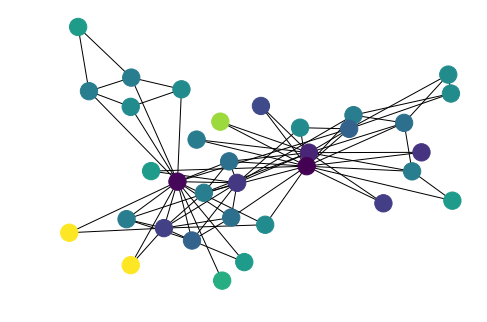

In [8]:
nx.draw(test_G, test_pos, node_color=[hks(test_G, .1, node) for node in test_G.nodes])

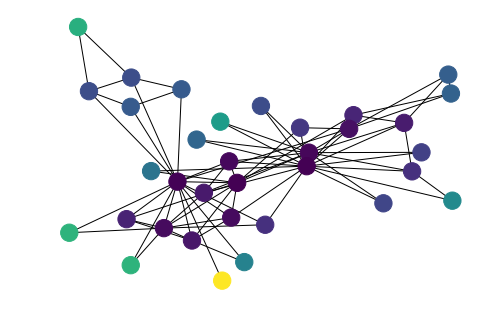

In [9]:
nx.draw(test_G, test_pos, node_color=[hks(test_G, 1, node) for node in test_G.nodes])

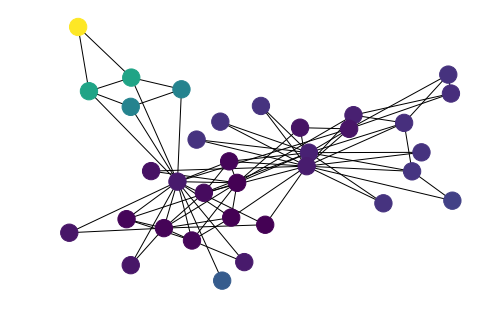

In [10]:
nx.draw(test_G, test_pos, node_color=[hks(test_G, 10, node) for node in test_G.nodes])

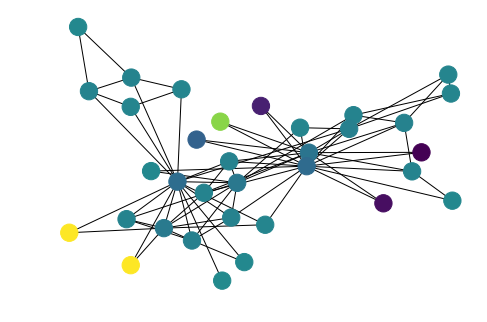

In [11]:
nx.draw(test_G, test_pos, node_color=[hks(test_G, .01, node) for node in test_G.nodes])

In [12]:
def compare_to_node(node, ts=[.01, .1, 1, 5, 10]):
    pos = nx.spring_layout(test_G)
    for t in ts:
        node_hks = hks(test_G, t, node)
        colors = [abs(hks(test_G, t, n) - node_hks) for n in test_G.nodes]
        cmap = matplotlib.cm.viridis_r
        plt.figure()
        plt.title('t = %s' % t)
        nx.draw(test_G, test_pos, node_color=colors, cmap=cmap, with_labels=True)

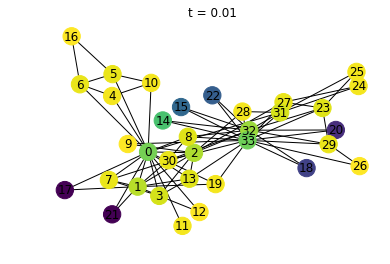

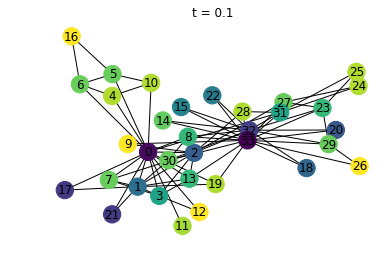

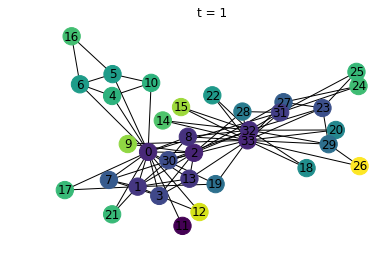

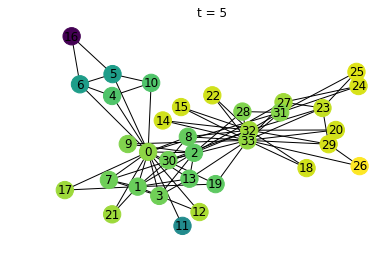

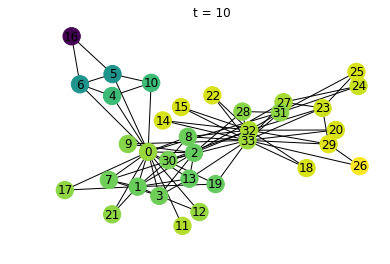

In [13]:
compare_to_node(26)

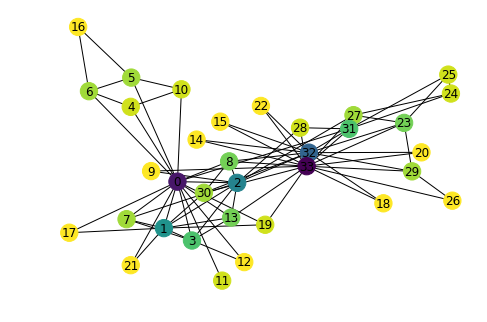

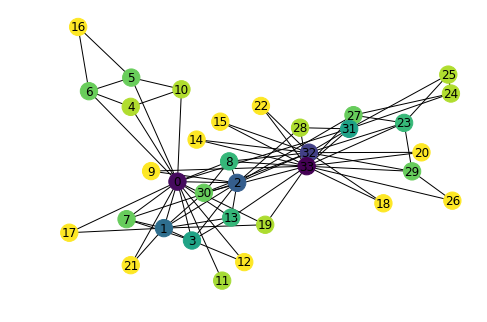

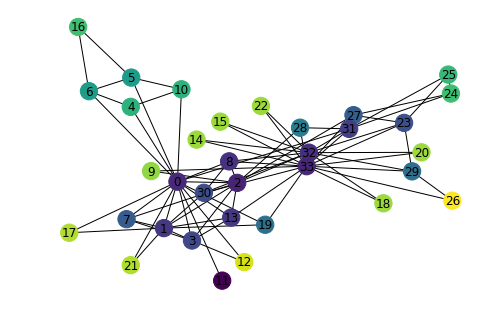

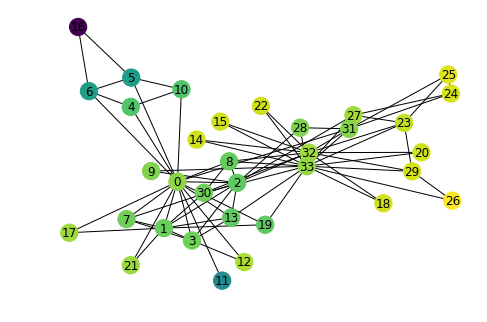

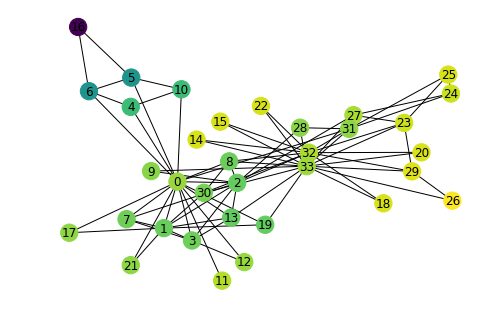

In [14]:
def compare_to_node_s(node, ts=[.01, .1, 1, 5, 10]):
    pos = nx.spring_layout(test_G)
    for t in ts:
        node_hks = hks_s(test_G, t, node)
        colors = [abs(hks_s(test_G, t, n) - node_hks) for n in test_G.nodes]
        cmap = matplotlib.cm.viridis_r
        plt.figure()
        nx.draw(test_G, test_pos, node_color=colors, cmap=cmap, with_labels=True)
compare_to_node_s(26)

0.8150074002397576 0.9606851927170504
0.9508825658730703
0.18113717429587473 0.8783677365929158
0.7960307658055988
0.009913621531439803 0.3721294898789381
0.18144403132208786
0.00010951032878208131 0.018831841309793144
0.0038221540403219102
2.4204155816698885e-06 0.0016658150912314317
0.0003245531926016968


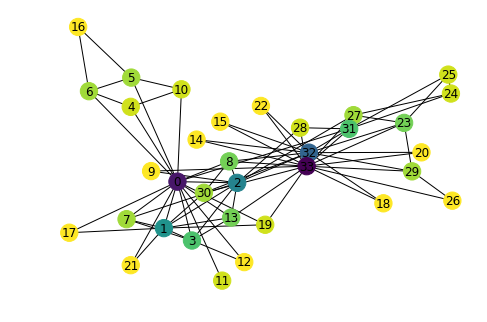

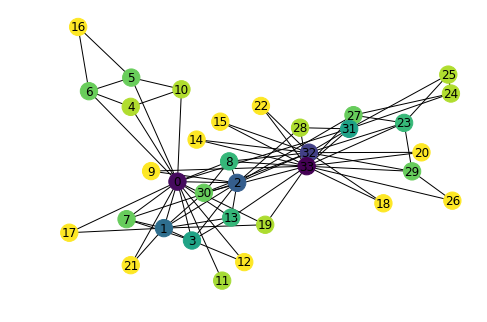

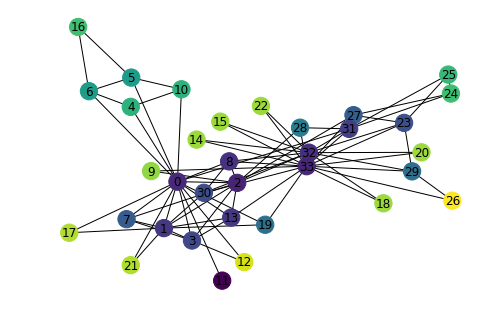

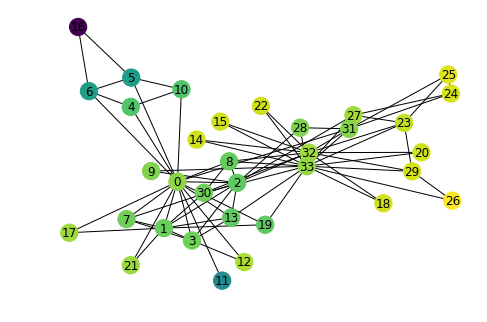

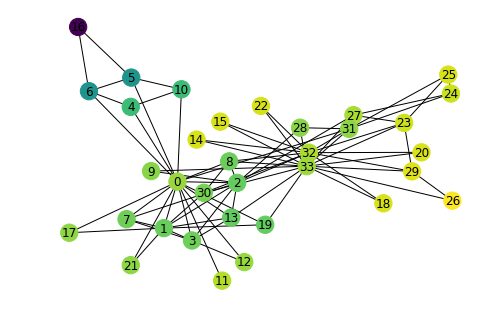

In [41]:
from heat_kernel_func import hks_s as hks_sp
def compare_to_node_p(node, ts=[.01, .1, 1, 5, 10]):
    pos = nx.spring_layout(test_G)
    for t in ts:
        hks_dict = hks_s_wrap(test_G, t, list(test_G.nodes()))
        print(min(hks_dict.values()), max(hks_dict.values()))
        node_hks = hks_dict[node]
        print(node_hks)
        colors = [abs(other_hks - node_hks) for i, other_hks in hks_dict.items()]
        cmap = matplotlib.cm.viridis_r
        plt.figure()
        nx.draw(test_G, test_pos, node_color=colors, cmap=cmap, with_labels=True)
compare_to_node_p(26)

In [35]:
kwargs = {'G': test_G, 't': .1, 'x': [0, 1, 2, 3, 4], 'k': 300}
def hks_s_wrap(G, t, x, k=300):
    out = {}
    for i in x:
        out[i] = hks_s(G, t, i, k)
    return out
print(hks_s_wrap(**kwargs))
print(hks_sp(**kwargs))

{0: 0.20022545756826232, 1: 0.4000164422778245, 2: 0.3614222110595094, 3: 0.5371363619975158, 4: 0.721658361794379}
0.1 [0, 1, 2, 3, 4]
{0: 0.20022545756826213, 1: 0.4000164422778247, 2: 0.36142221105950934, 3: 0.5371363619975164, 4: 0.721658361794379}


In [ ]:
############################### NOTE ###############################
## Check how average cluster size falls off with increases in T.  ##
## At least check to see how the distribution changes.            ##
####################################################################

In [14]:
# See Persistence-based Segmentation of Deformable Shapes, Section 3
def compute_persistence(G, tau=np.inf, f_name='hks', f=None, verbose=False):
    if f is None:
        f = nx.get_node_attributes(G, f_name)
    C = {node: {'parent': node, 'persistence': 0} for node in G.nodes()}
    roots = set(C.keys())
    
    PD_pairs = []
    
    def find(x, verbose=False):
        if verbose: print('find start', x, C[x])
        if C[x]['parent'] != x:
            C[x] = find(C[x]['parent'])
        if verbose: print('find end', x, C[x])
        return C[x] # return both the root, and persistence encoded at root
    
    num_iter = 0
    num_changes = -1
    while num_changes != 0:
        num_iter += 1        
        num_changes = 0
        
        f_subset = {k: f[k] for k in roots} # limit keys to local maxima
        sorted_keys = sorted(f_subset, key=lambda k: f[k], reverse=True)
        
        for x in sorted_keys:  # assign all nodes to a component
            # for nodes that have root x, union neighbors
            ys = set.union(*[set(G.neighbors(i)) for i in C.keys() if C[i]['parent']==x])
            ys = sorted(list(ys), key=lambda y: f[find(y)['parent']], reverse=True)
                        
            for y in ys:
                parent, persistence = find(y).values() 
                
                if x == parent:
                    break

                if f[x] > f[parent]: # max_fy:
                    if verbose: print('f(x) greater:', x, f[x], y, parent, f[parent])
                    break  # since x should be its own componenet

                if verbose: print('f(x) less/equal:', x, f[x], y, parent, f[parent])
                if verbose: print('C[%s]:'% y, C[y])

                if persistence < tau: # if > tau, segment into multiple clusters
                    num_changes += 1
                    roots.remove(x)
                    
                    PD_pairs.append((f[x], f[parent]))

                    if f[parent] - f[x] > persistence: 
                        # find new persistence of component
                        persistence = f[parent] - f[x]   
                    # set new parent, persistence of component it is in
                    C[x] = {'parent': parent, 'persistence': persistence}
                    # reset persistence of component at root
                    C[parent]['persistence'] = persistence

                    if verbose: print('assigned:', x, C[x])
                    break # done looking through y's
#                 else:
#                     break
                    #raise Exception('this hasnt been coded yet')
            if verbose: print()

        if verbose: print(len([k for k in C.keys() if k != C[k]['parent']]) / len(C.keys()))
        if verbose: print([k for k in C.keys() if k == C[k]['parent']])
    print('Finished with %s components in %s iterations' %
          (len([k for k in C.keys() if k == C[k]['parent']]), num_iter))
    return C, PD_pairs # remember to return persistence list as shown in algo paper

In [15]:
_, PD_points = compute_persistence(test_G, verbose=False)

Finished with 1 components in 3 iterations


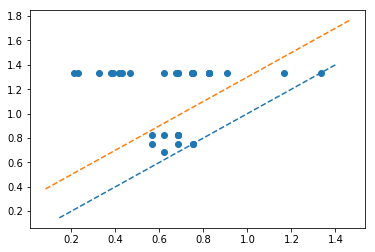

In [16]:
def plot_PD(PD_points, tau=None):
    def abline(slope, intercept):
        """Plot a line from slope and intercept"""
        axes = plt.gca()
        x_vals = np.array(axes.get_xlim())
        y_vals = intercept + slope * x_vals
        plt.plot(x_vals, y_vals, '--')

    plt.scatter(*zip(*PD_points))
    abline(1, 0)
    if tau is not None:
        abline(1, tau)
        
plot_PD(PD_points, .3)

In [17]:
C, _ = compute_persistence(test_G, tau=.3, verbose=False)

Finished with 17 components in 3 iterations


In [18]:
components = [value['parent'] for value in C.values()]

In [19]:
def plot_segments(G, tau):
    C, _ = compute_persistence(test_G, tau=tau, verbose=False)
    components = set([value['parent'] for value in C.values()])
    cmap = {c: plt.cm.get_cmap('tab20', len(components))(i) 
            for i, c in enumerate(components)}
    colors = [cmap[value['parent']] for value in C.values()]
    pos = nx.spring_layout(G)
    nx.draw(G, test_pos, node_color=colors, with_labels=True)

Finished with 17 components in 3 iterations


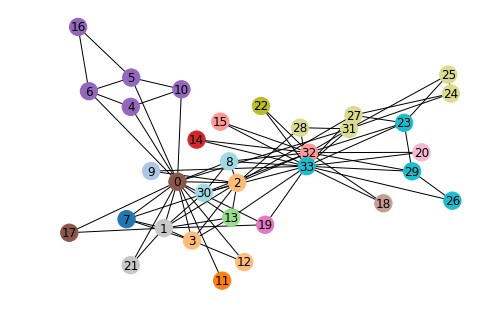

In [20]:
plot_segments(test_G, .3)

Finished with 1 components in 3 iterations
Finished with 1 components in 3 iterations
Finished with 1 components in 3 iterations
Finished with 1 components in 3 iterations
Finished with 1 components in 3 iterations


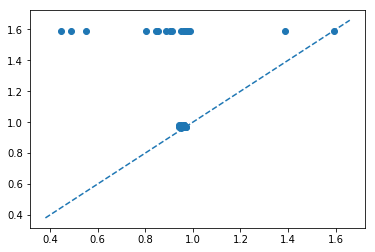

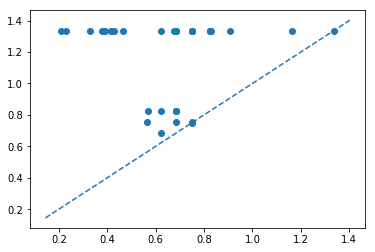

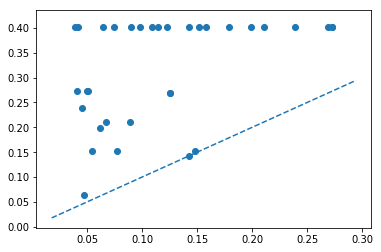

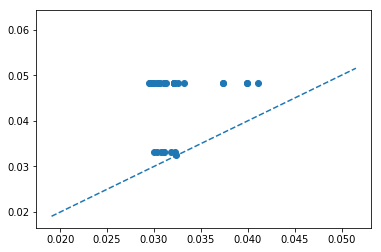

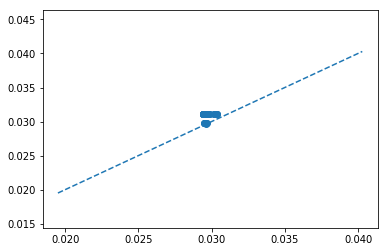

In [21]:
for t in [.01, .1, 1, 5, 10]:
    _, PD_points = compute_persistence(test_G, f={node: hks(test_G, t, node)
                                                  for node in test_G.nodes})
    plt.figure()
    plot_PD(PD_points)